In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('personal/amazon/01-Jan-2019_to_12-Mar-2020.csv')

In [3]:
df.head(5)[['Title', 'Category']]

,Title,Category
0,KENT Dual Drive Tandem Comfort Bike,OUTDOOR_RECREATION_PRODUCT
1,Suptikes Door Draft Stopper Under Door Seal fo...,BUILDING_MATERIAL
2,DITTY BIRD Baby Sound Books: Nursery Rhymes Mu...,CHILDRENS_COSTUME
3,"Keeping Fun Indoor Weather Stripping,Self Adhe...",HARDWARE
4,"WD-40 Bike, All Conditions Lube, Bike Wash, De...",OUTDOOR_RECREATION_PRODUCT


### convert date column to datetime, and convert dollar amount to a number.

In [4]:
df['amount'] = df['Item Total'].str.replace('$', '').astype(float)
df = df.rename(columns={'Order Date': 'order_date'})
df['order_date'] = pd.to_datetime(df['order_date'])

In [5]:
df['amount'].sum()

9267.230000000001

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### by month

<BarContainer object of 15 artists>

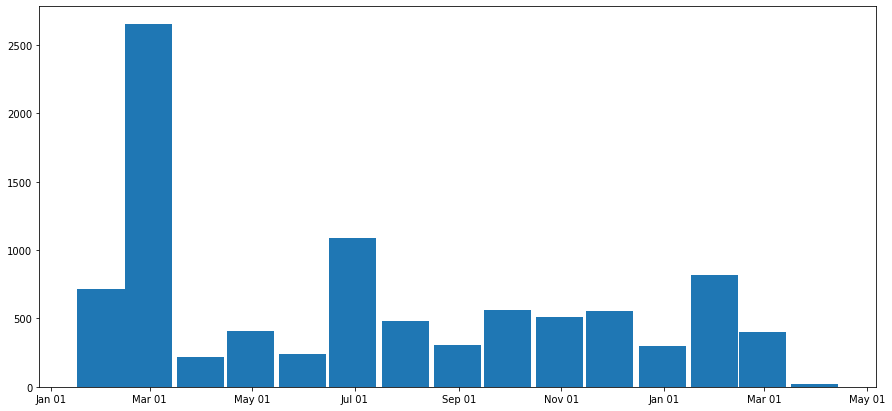

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

by_day = df[['order_date','amount']].set_index('order_date').resample('M').sum()
ax.bar(by_day.index, by_day['amount'], width=28)  # width here should be number of days we resampled by.

### by week

<BarContainer object of 63 artists>

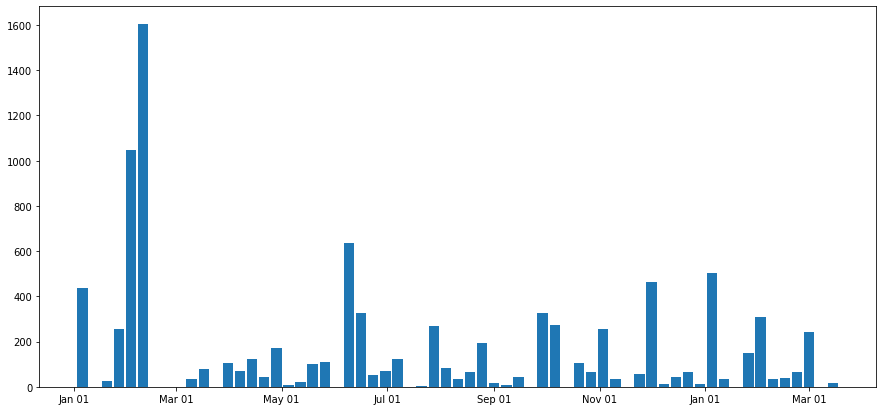

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

by_day = df[['order_date','amount']].set_index('order_date').resample('W').sum()
ax.bar(by_day.index, by_day['amount'], width=6)  # width here should be number of days we resampled by.

large spike between jan and march.

table view can tell better dates.

In [9]:
by_day.head(10)

,amount
order_date,
2019-01-06,434.90
2019-01-13,0.00
2019-01-20,23.85
2019-01-27,254.65
2019-02-03,1047.00
2019-02-10,1602.83
2019-02-17,0.00
2019-02-24,0.00
2019-03-03,0.00


### let's see what was ordered in this week.

In [10]:
orders_in_3_weeks = df[(df['order_date'] > '2002-01-27 01:00:00') & (df['order_date'] <= '2019-02-17 04:00:00')][['Title', 'Category', 'amount']]

### big items

In [11]:
orders_in_3_weeks[df['amount']>100]

/Users/rinozemt/personal_finance/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,Category,amount
0,KENT Dual Drive Tandem Comfort Bike,OUTDOOR_RECREATION_PRODUCT,402.54
7,"August Home ASL-03, AC-R1 Smart Lock Pro + Con...",HARDWARE,238.66
9,"Stokke Sleepi Natural Adjustable Baby Crib, Ea...",BED,799.00
10,"Stokke Sleepi Baby Crib Mattress by Colgate, f...",MATTRESS,199.00
12,Stokke Sleepi Crib Conversion Kit in Natural (...,BABY_PRODUCT,249.00
14,"Stokke Sleepi Baby Crib Mattress by Colgate, f...",MATTRESS,199.00
15,Stokke Sleepi Adjustable Oval Mini Baby Crib B...,BABY_PRODUCT,599.00
18,Stokke 2019 Tripp Trapp Bundle Natural w Beige...,BABY_PRODUCT,369.51


### see which categories you spend the most in these 3 weeks

In [12]:
orders_in_3_weeks[['Category', 'amount']].groupby('Category').sum().reset_index().sort_values(by='amount', ascending=False)

,Category,amount
1,BABY_PRODUCT,1363.47
2,BED,799.00
8,OUTDOOR_RECREATION_PRODUCT,427.04
7,MATTRESS,398.00
6,HARDWARE,254.53
9,TOYS_AND_GAMES,57.75
5,FITTED_SHEET,31.61
4,CHILDRENS_COSTUME,16.49
3,BUILDING_MATERIAL,9.99
0,ADHESIVES_AND_SEALANTS,5.35


### and over all time?

In [13]:
df[['Category', 'amount']].groupby('Category').sum().reset_index().sort_values(by='amount', ascending=False).head(10)

,Category,amount
3,BABY_PRODUCT,2589.95
17,HEALTH_PERSONAL_CARE,2170.78
26,OUTDOOR_RECREATION_PRODUCT,960.63
6,BED,799.00
18,HOME,572.73
24,MATTRESS,398.00
15,HARDWARE,312.77
14,GROCERY,209.99
30,SKIN_CLEANING_WIPE,182.74
22,KITCHEN,139.48


### overall categories we spend in

In [14]:
df['Category'].value_counts()

HEALTH_PERSONAL_CARE          55
BABY_PRODUCT                  31
SKIN_CLEANING_WIPE            12
OUTDOOR_RECREATION_PRODUCT     9
HOME                           8
TOYS_AND_GAMES                 7
PET_SUPPLIES                   6
GROCERY                        6
HARDWARE                       6
WIRELESS_ACCESSORY             5
KITCHEN                        4
ABIS_BOOK                      3
DIGITAL_DEVICE_3               3
CELLULAR_PHONE_CASE            2
BATTERY                        2
FITTED_SHEET                   2
WRITING_INSTRUMENT             2
BUILDING_MATERIAL              2
ACCESSORY                      2
MATTRESS                       2
HOME_LIGHTING_ACCESSORY        1
PAPER_PRODUCT                  1
BED                            1
SECURITY_CAMERA                1
OUTDOOR_LIVING                 1
VDO_DEVICES                    1
CHILDRENS_COSTUME              1
LIGHT_SOURCE                   1
HOME_BED_AND_BATH              1
ADHESIVES_AND_SEALANTS         1
DIGITAL_DE